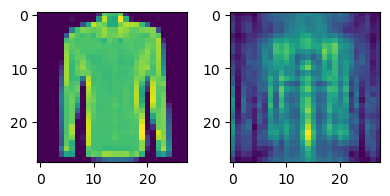

In [202]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf 
import  numpy as np 
#from scipy.misc import  imresize
from tqdm import tqdm
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.reset()
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

# Fashion - MNIST - https://github.com/zalandoresearch/fashion-mnist
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images.reshape((60000,  28, 28,1))
test_images = test_images.reshape((10000, 28, 28,1))

train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

input_shape = (28, 28,1)


# N = 129
# d = 3 # plate spacing
# lam = 1    # wavelength 
# P = 0.25  # pitch of metasurface
# L = 1  # number of plates



def propagate(x):
    N = 28
    d = 2 # plate spacing
    lam = 1    # wavelength 
    P = 0.25  # pitch of metasurface
    df = 1.0/(N*P)
    k = np.pi*2.0/lam
    def phase(i,j):
        i -= N//2
        j -= N//2
        return ((i*df)*(i*df)+(j*df)*(j*df))
    ph  = np.fromfunction(phase,shape=(N,N),dtype=np.float32)
    H = np.exp(1.0j*k*d)*np.exp(-1.0j*lam*np.pi*d*ph) 

    return np.fft.ifft2(np.fft.fftshift(H)*np.fft.fft2(x))




plt.figure(figsize=(4,2))
plt.subplot(121)
u = np.squeeze(train_images_norm[40])
u2 = np.abs(propagate(u))
plt.imshow(u)
plt.subplot(122)
plt.imshow(u2)
plt.tight_layout()
plt.show()




# def create_propag(P, d, M, N, lam):
#     tran = (1j)*np.zeros((M,N))
#     k = 2*np.pi/lam
#     for u in range(M):
#         for v in range(N):
#             print(u,v)
#             for m in range(M):
#                 for n in range(N):
#                     r_uvmn = np.sqrt( ((m-u)*P)**2 + ((n-v)*P)**2 + d**2)
#                     costheta = d/r_uvmn 
#                     term_mn= np.exp(1j*k*r_uvmn)/r_uvmn
#                     term_mn*= (1.0/(1j*lam))*costheta
#                     tran[u][v]+= term_mn
#     return tran

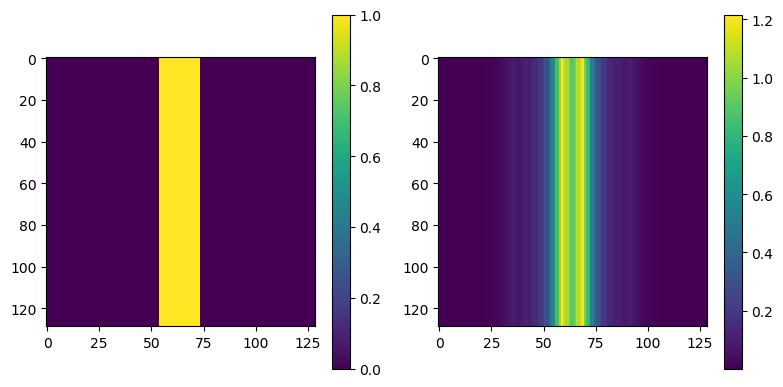

In [178]:
u0 = np.zeros((M,N))
u0[:,54:74] = 1


df = 1.0/(N*P)
k = np.pi*2.0/lam

def phase(i,j):
    i -= N//2
    j -= N//2
    return ((i*df)*(i*df)+(j*df)*(j*df))
ph  = np.fromfunction(phase,shape=(N,N),dtype=np.float32)

H = np.exp(1.0j*k*d)*np.exp(-1.0j*lam*np.pi*d*ph) 

u1 = np.fft.ifft2(np.fft.fftshift(H)*np.fft.fft2(u0))



#plt.figure(figsize=(2,2))
#u0 = np.zeros((M,N))
#u0[34:94,34:94] = 1

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(u0)
plt.colorbar()
plt.subplot(122)
plt.imshow(np.abs(u1))
plt.tight_layout()
plt.colorbar()
plt.show()

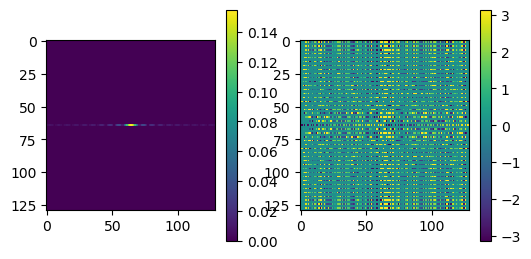

In [179]:
trmatf = np.fft.fft2(u0)/(129*129)
trmat = np.fft.fftshift(trmatf)
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(np.abs(trmat) )
plt.colorbar()
plt.subplot(122)
plt.imshow(np.angle(trmat) )
plt.colorbar()
plt.show()
plt.tight_layout()

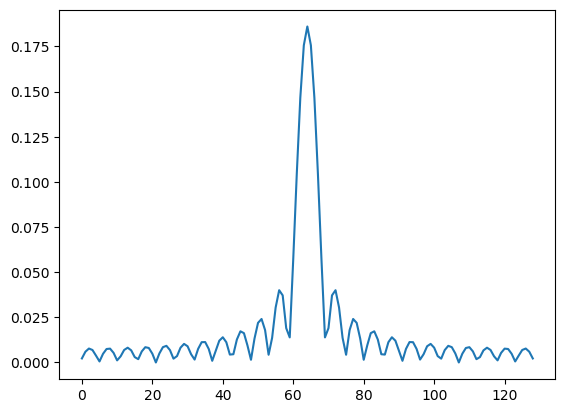

In [78]:
plt.plot(np.abs(np.real(trmat)[64] + 1j*np.imag(trmat)[64]) /(129*129) )
plt.show()

In [56]:
a = np.mgrid[:21, :21][0]
a

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,

In [52]:
a[:,10] = 1

In [57]:
aft = np.fft.fft2(a)

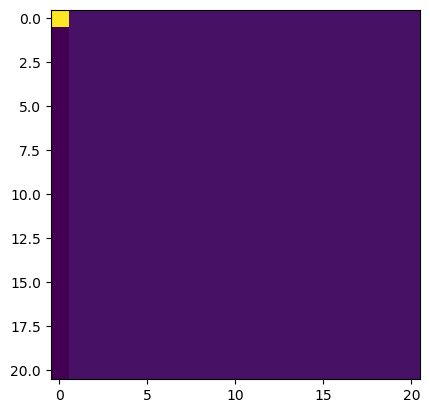

In [58]:
plt.imshow( np.real(aft))
plt.show()

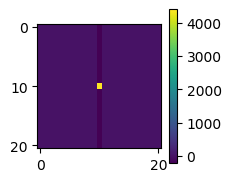

In [59]:
plt.figure(figsize=(2,2))
aftsh = np.fft.fftshift(aft)
plt.imshow(np.real(aftsh))
plt.colorbar()
plt.show()

In [50]:
aft

array([[ 1.        +0.00000000e+00j, -0.98883083-1.49042266e-01j,
         0.95557281+2.94755174e-01j, -0.90096887-4.33883739e-01j,
         0.82623877+5.63320058e-01j, -0.73305187-6.80172738e-01j,
         0.6234898 +7.81831482e-01j, -0.5       -8.66025404e-01j,
         0.36534102+9.30873749e-01j, -0.22252093-9.74927912e-01j,
         0.07473009+9.97203797e-01j,  0.07473009-9.97203797e-01j,
        -0.22252093+9.74927912e-01j,  0.36534102-9.30873749e-01j,
        -0.5       +8.66025404e-01j,  0.6234898 -7.81831482e-01j,
        -0.73305187+6.80172738e-01j,  0.82623877-5.63320058e-01j,
        -0.90096887+4.33883739e-01j,  0.95557281-2.94755174e-01j,
        -0.98883083+1.49042266e-01j],
       [-0.98883083-1.49042266e-01j,  0.95557281+2.94755174e-01j,
        -0.90096887-4.33883739e-01j,  0.82623877+5.63320058e-01j,
        -0.73305187-6.80172738e-01j,  0.6234898 +7.81831482e-01j,
        -0.5       -8.66025404e-01j,  0.36534102+9.30873749e-01j,
        -0.22252093-9.74927912e-01j,  

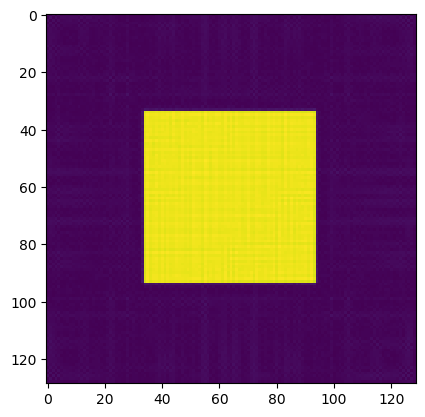

In [107]:
plt.imshow(np.abs(u1))
plt.show()

In [175]:
u1

array([[ 1.41915411e-04+0.00142967j, -2.99809561e-04-0.00142507j,
         4.59274515e-04+0.001416j  , ...,  3.31341274e-04-0.00141638j,
        -1.72841283e-04+0.0014254j ,  1.53928813e-05-0.00142979j],
       [ 1.41915411e-04+0.00142967j, -2.99809561e-04-0.00142507j,
         4.59274515e-04+0.001416j  , ...,  3.31341274e-04-0.00141638j,
        -1.72841283e-04+0.0014254j ,  1.53928813e-05-0.00142979j],
       [ 1.41915411e-04+0.00142967j, -2.99809561e-04-0.00142507j,
         4.59274515e-04+0.001416j  , ...,  3.31341274e-04-0.00141638j,
        -1.72841283e-04+0.0014254j ,  1.53928813e-05-0.00142979j],
       ...,
       [ 1.41915411e-04+0.00142967j, -2.99809561e-04-0.00142507j,
         4.59274515e-04+0.001416j  , ...,  3.31341274e-04-0.00141638j,
        -1.72841283e-04+0.0014254j ,  1.53928813e-05-0.00142979j],
       [ 1.41915411e-04+0.00142967j, -2.99809561e-04-0.00142507j,
         4.59274515e-04+0.001416j  , ...,  3.31341274e-04-0.00141638j,
        -1.72841283e-04+0.0014254j 